In [1]:
from lightkurve import search_targetpixelfile
# First we open a Target Pixel File from MAST, this one is already cached from our previous tutorial!
tpf = search_targetpixelfile('KIC 6922244', quarter=4).download()

# Then we convert the target pixel file into a light curve using the pipeline-defined aperture mask.
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [2]:
lc.mission

'Kepler'

In [3]:
lc.quarter

4

In [4]:
lc.time, lc.flux

(array([352.37632485, 352.39675805, 352.43762445, ..., 442.16263546,
        442.18306983, 442.2035041 ]),
 array([43689.15 , 43698.08 , 43694.105, ..., 43155.8  , 43148.465,
        43151.562], dtype=float32))

In [5]:
lc.estimate_cdpp()

75.2986784032268

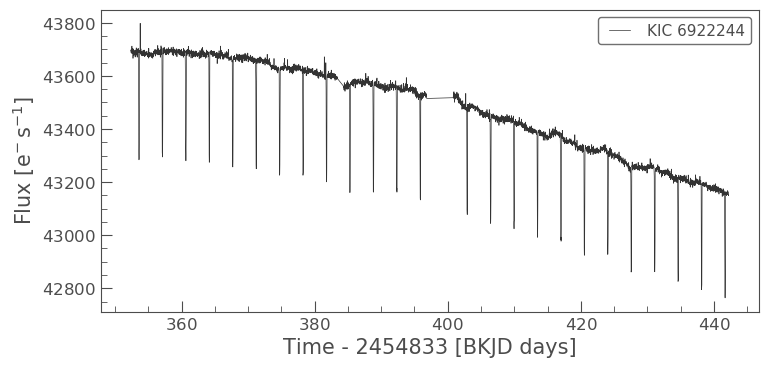

In [6]:
%matplotlib inline
lc.plot();

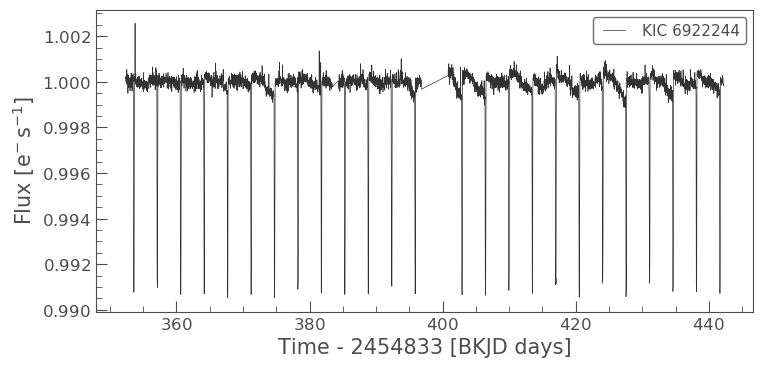

In [7]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot();

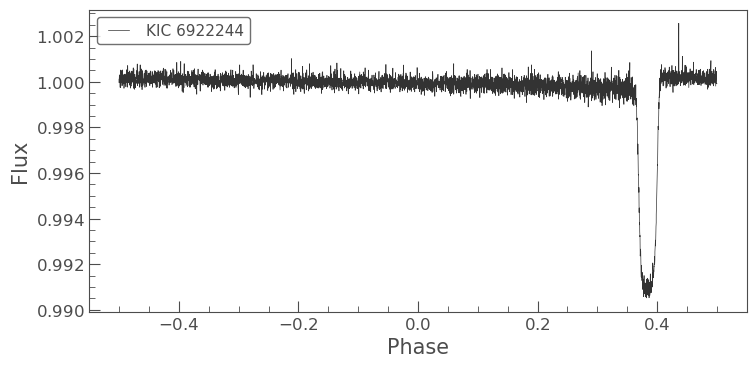

In [8]:
folded_lc = flat_lc.fold(period=3.5225)
folded_lc.plot();

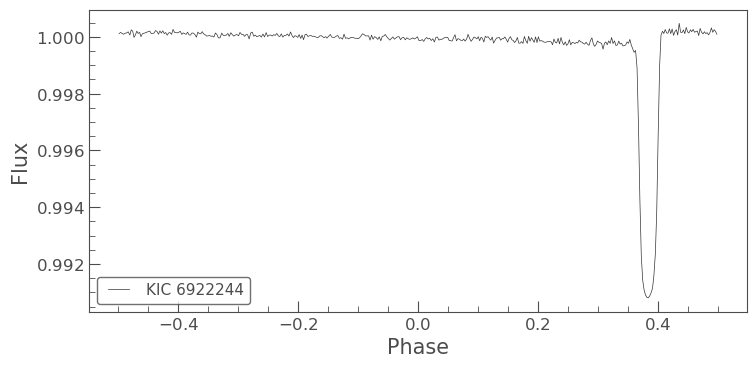

In [9]:

binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot();

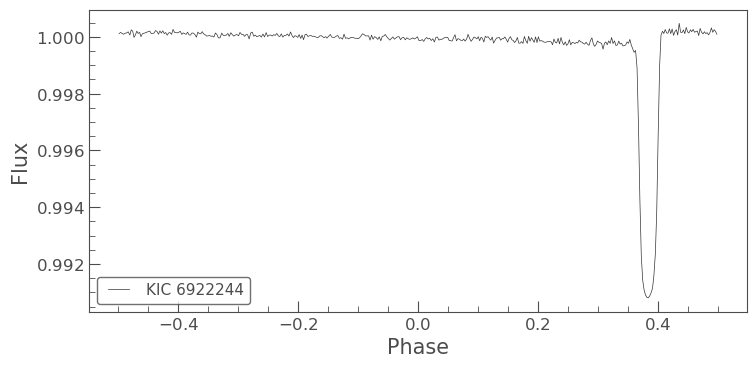

In [10]:
lc.remove_nans().flatten(window_length=401).fold(period=3.5225).bin(binsize=10).plot();

In [11]:
from lightkurve import search_lightcurvefile
lcf = search_lightcurvefile('KIC 6922244', quarter=4).download()

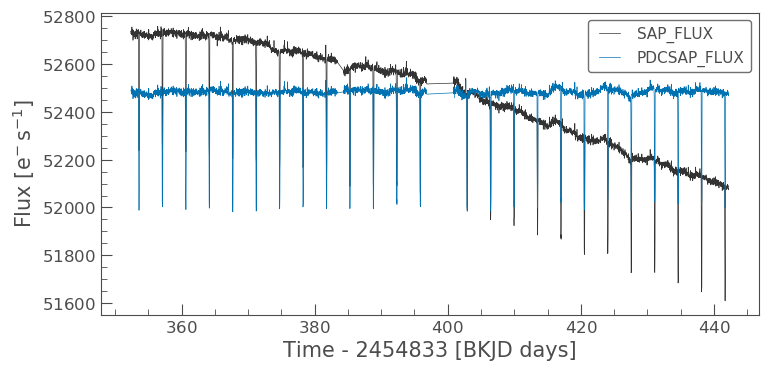

In [12]:
lcf.plot();

In [13]:
pdcsap = lcf.PDCSAP_FLUX

In [17]:
#sapflux = lcf.SAP_FLUX

In [15]:
lcf

KeplerLightCurveFile(ID: 6922244)

In [16]:
pdcsap

KeplerLightCurve(ID: 6922244)

In [18]:
pdcsap.mission

'Kepler'

In [19]:
pdcsap.quarter

4

In [20]:
pdcsap.estimate_cdpp()

58.915944642421216

In [21]:
from lightkurve import search_lightcurvefile
lc = search_lightcurvefile('10264202', quarter=10).download().PDCSAP_FLUX.remove_nans()

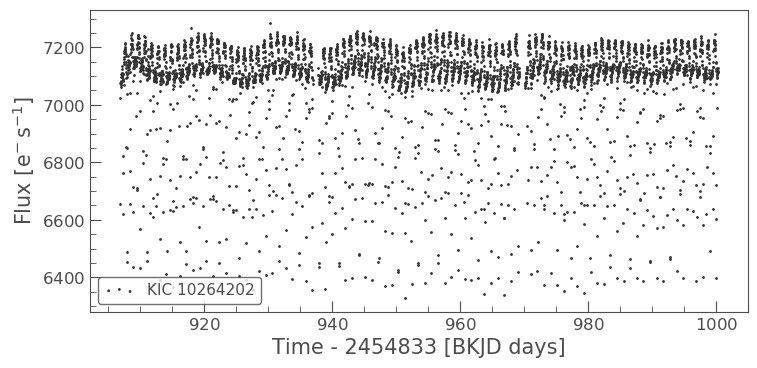

In [22]:
lc.scatter();

In [23]:
pg = lc.to_periodogram(oversample_factor=1)

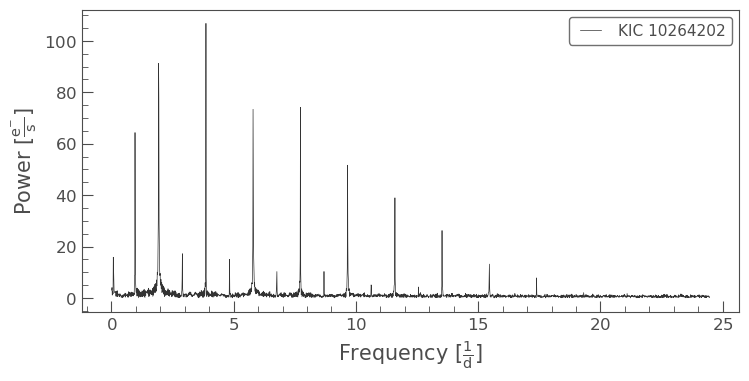

In [24]:
pg.plot();

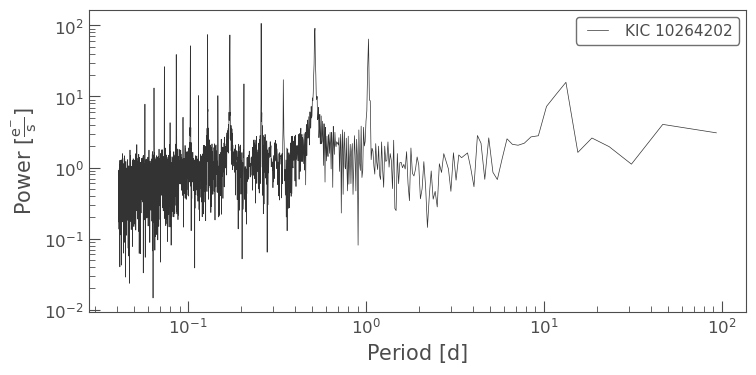

In [25]:
pg.plot(view='period', scale='log');

In [26]:
pg.period

<Quantity [9.34019490e+01, 4.67009745e+01, 3.11339830e+01, ...,
           4.09119356e-02, 4.08940232e-02, 4.08761265e-02] d>

In [27]:
pg.power

<Quantity [3.08123446, 4.04910021, 1.11686323, ..., 0.38587616, 0.17210997,
           0.42668004] electron / s>

In [28]:
pg.period_at_max_power

<Quantity 0.25873116 d>

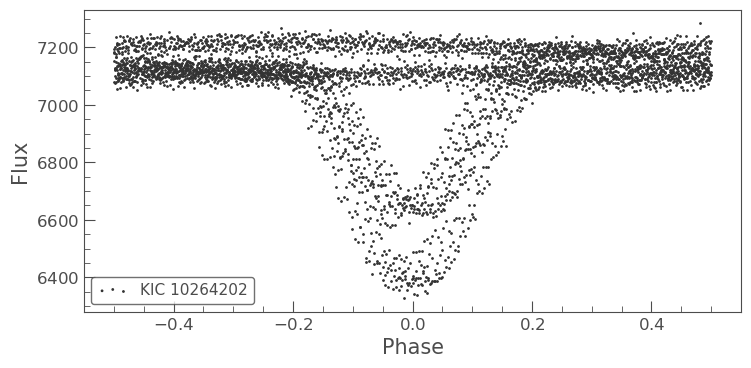

In [29]:
lc.fold(pg.period_at_max_power).scatter();

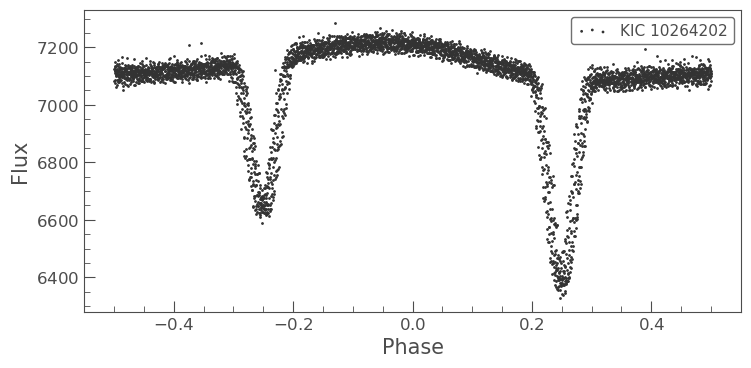

In [30]:
lc.fold(4 * pg.period_at_max_power).scatter();

In [31]:
import astropy.units as u
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)
pg.period_at_max_power

<Quantity 1.03509717 d>

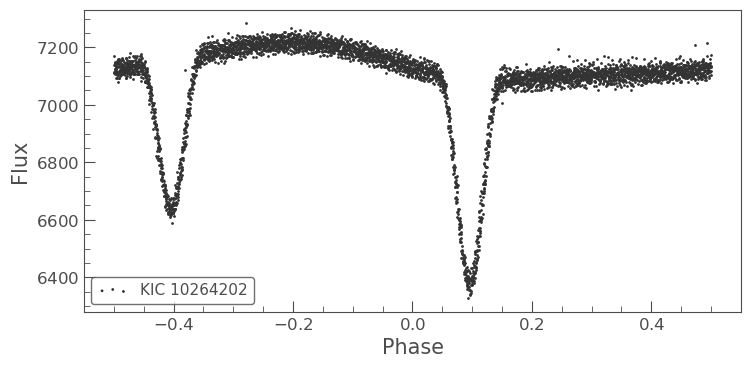

In [32]:
lc.fold(pg.period_at_max_power).scatter();